In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
 raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]
             ]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [3]:
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

In [4]:
X_train

array([[3.39353321, 2.33127338],
       [3.11007348, 1.78153964],
       [1.34380883, 3.36836095],
       [3.58229404, 4.67917911],
       [2.28036244, 2.86699026],
       [7.42343694, 4.69652288],
       [5.745052  , 3.5339898 ],
       [9.17216862, 2.51110105],
       [7.79278348, 3.42408894],
       [7.93982082, 0.79163723]])

In [5]:
y_train

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

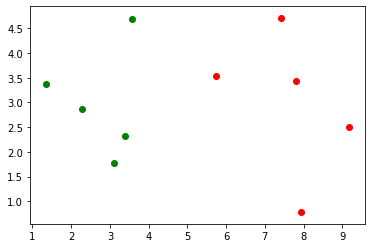

In [6]:
plt.scatter(X_train[y_train == 0,0],X_train[y_train == 0,1],color="g")
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],color="r")
plt.show()

#### 预测

In [7]:
x = np.array([8.093607318, 3.365731514])

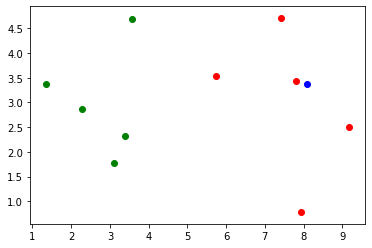

In [8]:
plt.scatter(X_train[y_train == 0,0],X_train[y_train == 0,1],color="g")
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],color="r")
plt.scatter(x[0],x[1],color="b")
plt.show()

In [9]:
 distances = []

In [10]:
from math import sqrt
for x_train in X_train:
    d = sqrt(np.sum((x_train - x)**2))
    distances.append(d)

In [11]:
distances

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

![image](https://s1.ax1x.com/2020/05/02/JvREzq.png)

In [12]:
distances = [sqrt(np.sum((x_train - x)**2)) for x_train in X_train]

In [13]:
distances

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

In [14]:
np.argsort(distances) #排序 返回索引

array([8, 7, 5, 6, 9, 3, 0, 1, 4, 2])

In [15]:
nearest = np.argsort(distances)

In [16]:
k = 6

In [17]:
topK_y = [y_train[i] for i in nearest[:k]]

In [18]:
topK_y

[1, 1, 1, 1, 1, 0]

In [19]:
from collections import Counter

In [20]:
votes = Counter(topK_y)

In [21]:
votes

Counter({1: 5, 0: 1})

In [22]:
votes.most_common(1) #票数最多的一个元素，返回的list

[(1, 5)]

In [23]:
votes.most_common(1)[0][0]

1

In [24]:
predict_y = votes.most_common(1)[0][0]

In [25]:
predict_y

1

### 使用sklean 中 的 CNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
KNN_classifier = KNeighborsClassifier(n_neighbors=6)

In [28]:
KNN_classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [29]:
#KNN_classifier.predict(x) #Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [30]:
X_predict = x.reshape(1,-1)

In [31]:
KNN_classifier.predict(X_predict)

array([1])

In [32]:
from myPack.KNN import KNNClassifier

In [33]:
knn_clf = KNNClassifier(k=6)

In [34]:
knn_clf.fit(X_train,y_train)

KNN(k=6)

In [35]:
y_predict = knn_clf.predict(X_predict)

In [36]:
y_predict

array([1])

### 准确度

In [37]:
from sklearn import datasets

In [38]:
digits = datasets.load_digits()

In [39]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [40]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [41]:
x = digits.data

In [42]:
x.shape

(1797, 64)

In [43]:
y = digits.target

In [44]:
y.shape

(1797,)

In [45]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [46]:
x[:10,:]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [47]:
some_digit = x[666]

In [48]:
y[666]

0

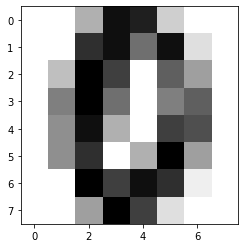

In [49]:
some_digit_image = some_digit.reshape(8,8)
plt.imshow(some_digit_image,cmap = matplotlib.cm.binary)
plt.show()

In [50]:
from myPack.model_selection import train_test_split

In [51]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_radio=0.2)

In [52]:
X_train.shape

(1438, 64)

In [53]:
y_train.shape

(1438,)

In [54]:
from myPack.KNN import KNNClassifier

In [55]:
my_knn_clf = KNNClassifier(k = 3)

In [56]:
my_knn_clf.fit(X_train,y_train)

KNN(k=3)

In [ ]:
y_predict = my_knn_clf.predict(X_test)

In [ ]:
sum(y_predict == y_test)/len(y_test)

In [ ]:
sum(y_predict == y_test)

In [ ]:
my_knn_clf.score(X_test,y_test)

In [58]:
sum(y_predict == y_test)/len(y_test)

0.9805013927576601

In [59]:
sum(y_predict == y_test)

352

In [60]:
my_knn_clf.score(X_test,y_test)

0.9805013927576601